In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib

from IPython.display import display, HTML

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [4]:
model1_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/modelling1.csv'
m = pd.read_csv(model1_path)

In [5]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723967 entries, 0 to 723966
Data columns (total 39 columns):
Unnamed: 0                723967 non-null int64
msno                      723967 non-null object
is_churn                  723967 non-null int64
city                      723967 non-null int64
registered_via            723967 non-null int64
registration_init_time    723967 non-null object
payment_method_id         723967 non-null int64
payment_plan_days         723967 non-null int64
plan_list_price           723967 non-null int64
actual_amount_paid        723967 non-null int64
is_auto_renew             723967 non-null int64
transaction_date          723967 non-null object
membership_expire_date    723967 non-null object
is_cancel                 723967 non-null int64
transaction_count         723967 non-null int64
methods_used              723967 non-null int64
plans_used                723967 non-null int64
discount                  723967 non-null int64
percent_off          

In [6]:
del m['Unnamed: 0']

In [7]:
features = m.drop(['is_churn'], axis=1).columns

for var in features:
    number = LabelEncoder()
    m[var] = number.fit_transform(m[var].astype('str'))

y = m['is_churn']
X = m[features] 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.98


In [11]:
predictions = rf.predict(X_test)
probs = rf.predict_proba(X_test)

,Predicted False,Predicted True
Actual False,135270,523
Actual True,2124,6877


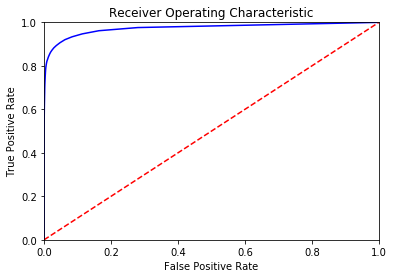

In [12]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print(rf_roc_auc)

0.88008738447


In [16]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

10-fold cross validation average accuracy: 0.98


In [17]:
print(classification_report(y_test, rf.predict(X_test)))
#Precision is the ratio of correctly predicted positive observations to the total predicted positive observations; Precision = TP/TP+FP
#Recall is the ratio of correctly predicted positive observations to the all observations in actual class; Recall = TP/TP+FN
#F1 Score is the weighted average of Precision and Recall
#the number of true instances for each label

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    135793
          1       0.93      0.76      0.84      9001

avg / total       0.98      0.98      0.98    144794



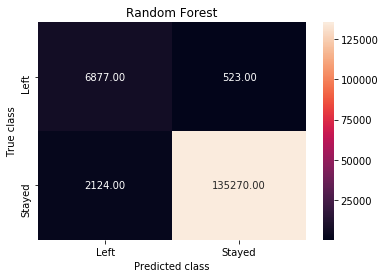

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)

forest_cm = confusion_matrix(y_pred, y_test, [1,0])

sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

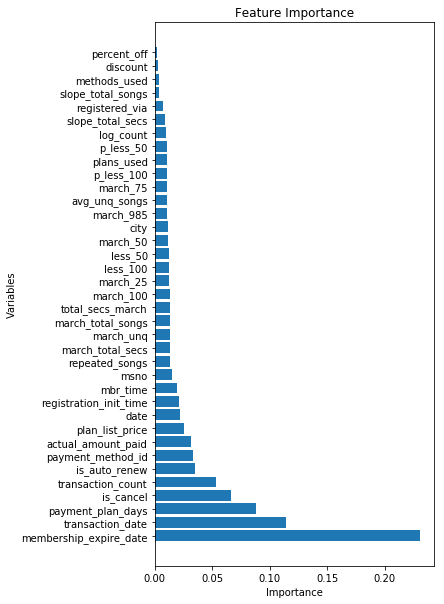

In [19]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)

df = pd.DataFrame(rf.feature_importances_, columns=["Importance"])
df["Variables"] = features
df.sort_values("Importance", inplace=True, ascending=False)

index = np.arange(len(rf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index, df["Importance"], label='Main')
plt.title('Feature Importance')
plt.yticks(index, df["Variables"])
plt.xlabel("Importance")
plt.ylabel("Variables")

plt.show()

In [20]:
feature_labels = features
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

percent_off-0.19%
discount-0.31%
methods_used-0.38%
slope_total_songs-0.40%
registered_via-0.69%
slope_total_secs-0.92%
log_count-1.03%
p_less_50-1.03%
plans_used-1.06%
p_less_100-1.07%
march_75-1.07%
avg_unq_songs-1.11%
march_985-1.11%
city-1.13%
march_50-1.16%
less_50-1.21%
less_100-1.24%
march_25-1.24%
march_100-1.31%
total_secs_march-1.33%
march_total_songs-1.35%
march_unq-1.35%
march_total_secs-1.36%
repeated_songs-1.36%
msno-1.50%
mbr_time-1.90%
registration_init_time-2.14%
date-2.19%
plan_list_price-2.54%
actual_amount_paid-3.12%
payment_method_id-3.30%
is_auto_renew-3.49%
transaction_count-5.37%
is_cancel-6.68%
payment_plan_days-8.80%
transaction_date-11.46%
membership_expire_date-23.12%
